In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
from statistics import mean
from scipy import stats

### Read in pickled df (made in cleaning)

In [2]:
df = pd.read_pickle("cleaned_df.pkl")
df.head()

,Name,Platform,release_date,summary,meta_score,user_review,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,as young boy link tricked ganondorf king gerud...,99,9.1,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,as most major publishers development efforts s...,98,7.4,2000,Sports,Activision,3.05,1.41,0.02,0.20,4.68
2,Grand Theft Auto IV,PlayStation 3,2008-04-29,"metacritic 2008 ps3 game year also known ""gta ...",98,7.7,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
3,SoulCalibur,Dreamcast,1999-09-08,this tale souls swords transcending world hist...,98,8.4,1999,Fighting,Namco Bandai Games,0.00,0.00,0.34,0.00,0.34
4,Grand Theft Auto IV,Xbox 360,2008-04-29,metacritic 2008 xbox 360 game year also known ...,98,7.9,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02


# Find words that significantly change Global Sales

### Find most frequent words

In [3]:
# find all unique words in the summaries and select only the ones that appear >200 times
unique = dict(Counter(" ".join(df["summary"]).split()))
unique_copy = unique.copy()
for key in unique_copy:
    if unique_copy[key] <= 200:
        del unique[key]
len(unique) # how many words show up more than 200 times in the summaries

303

In [4]:
# delete words that are specific to one game, platform, or company
delete = ["wii","xbox","sega","nintendo","mario","nfl","ea","ds","nba","sonic"]
for i in delete:
    del unique[i]
unique

{'young': 213,
 'evil': 604,
 'he': 668,
 'his': 1603,
 'create': 672,
 'so': 270,
 'help': 399,
 'through': 1639,
 'time': 1342,
 'powers': 301,
 'most': 899,
 'any': 408,
 'next': 417,
 '2': 728,
 'one': 1170,
 'games': 973,
 'game': 3815,
 'year': 268,
 'also': 977,
 'known': 308,
 'off': 604,
 'past': 214,
 'together': 319,
 'find': 363,
 'city': 746,
 'land': 267,
 'series': 825,
 'discover': 214,
 'different': 525,
 'world': 2514,
 'history': 212,
 'weapons': 713,
 'based': 701,
 'graphics': 215,
 'make': 519,
 'head': 490,
 'ultimate': 406,
 'hero': 419,
 'taking': 220,
 'out': 929,
 'space': 205,
 'join': 232,
 'new': 4813,
 'video': 220,
 'across': 433,
 'some': 321,
 'enemies': 721,
 'players': 3846,
 'battle': 1234,
 'explore': 406,
 'full': 419,
 'use': 814,
 'features': 1291,
 'do': 203,
 'before': 545,
 'moves': 505,
 'around': 408,
 'takes': 479,
 'unique': 873,
 'items': 223,
 'super': 370,
 'original': 543,
 'includes': 269,
 'first': 917,
 'challenge': 418,
 'back': 4

### Create df of whether or not each game's summary contains each of the frequent words

In [5]:
# create empty df to fill with whether or not each game's summary contains each word
words = pd.DataFrame(df[["Name","Global_Sales"]],columns = ["Name","Global_Sales"]+list(unique.keys()))

In [6]:
# fill data frame with whether the game contains the word (T or F)
for i in range(len(df)):
    for j in list(unique.keys()):
        if j in df["summary"][i]:
            words[j][i] = True
        else:
            words[j][i] = False
words.head()

/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_63826/397491220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words[j][i] = True
/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_63826/397491220.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words[j][i] = False


,Name,Global_Sales,young,evil,he,his,create,so,help,through,...,free,bring,side,exciting,allowing,10,feature,ball,dragon,party
0,The Legend of Zelda: Ocarina of Time,7.60,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,Tony Hawk's Pro Skater 2,4.68,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Grand Theft Auto IV,10.57,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,SoulCalibur,0.34,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Grand Theft Auto IV,11.02,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Create df of average global sales with and without each frequent word

In [7]:
# create df that contains the mean user review of games with and without the words
words_aves = pd.DataFrame(columns = ["word","ave_with","ave_without"])
words_aves["word"] = words.columns[2:] # make each word a row
words_aves.head()
for i in list(unique.keys()):
    words_aves.loc[words_aves["word"] == i , "ave_with"] = mean(words.Global_Sales[words[i] == True])
    words_aves.loc[words_aves["word"] == i , "ave_without"] = mean(words.Global_Sales[words[i] == False])
    
words_aves["difference"] = words_aves["ave_with"]-words_aves["ave_without"]
words_aves.head()

,word,ave_with,ave_without,difference
0,young,0.610585,0.862181,-0.251596
1,evil,0.621074,0.878719,-0.257645
2,he,0.871862,0.786245,0.085617
3,his,0.865566,0.846984,0.018582
4,create,0.796787,0.862345,-0.065558


### Test for significance - are the average global sales significantly different with and without each word?

In [8]:
# two-sided ttest for each word
# when pvalue small, reject the null hyp that the means are equal
words_aves["pvalue"]=""
for word in words.columns[2:]:
    test = stats.ttest_ind(words["Global_Sales"][words[word]== True], \
                       words["Global_Sales"][words[word]== False])
    words_aves["pvalue"][words_aves["word"]==word] = test.pvalue

In [9]:
# create column of whether or not significant
words_aves["significant"] = words_aves["pvalue"].map(lambda x: x < .05)
words_aves.head()

,word,ave_with,ave_without,difference,pvalue,significant
0,young,0.610585,0.862181,-0.251596,0.094295,False
1,evil,0.621074,0.878719,-0.257645,0.007181,True
2,he,0.871862,0.786245,0.085617,0.216512,False
3,his,0.865566,0.846984,0.018582,0.770561,False
4,create,0.796787,0.862345,-0.065558,0.418369,False


### Plot the effects of the significant words

Text(0.5, 1.0, 'Significant Words')

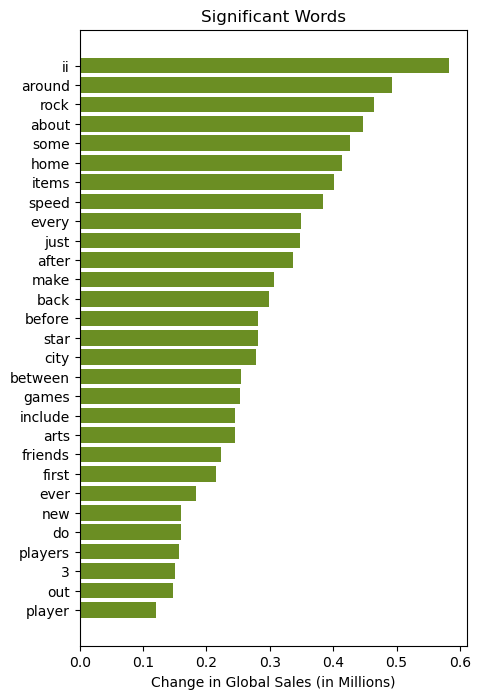

In [10]:
# plot significant words' effects. Positive first
words_sig = words_aves[words_aves["significant"]==True].sort_values("difference")

plt.figure(figsize=(5, 8))
plt.barh(words_sig["word"][words_sig["difference"]>0],words_sig["difference"][words_sig["difference"]>0], \
         color="olivedrab")
plt.xlabel("Change in Global Sales (in Millions)")
plt.title("Significant Words")

Text(0.5, 1.0, 'Significant Words')

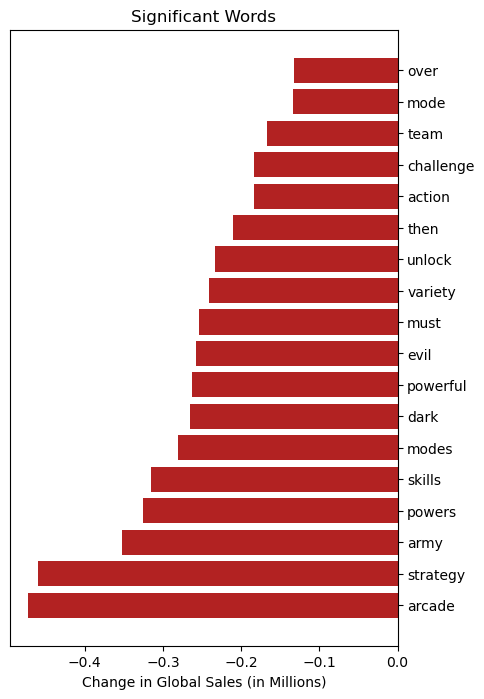

In [11]:
# now plot negative

f = plt.figure(figsize=(5, 8))
ax = f.add_subplot(111)
ax.yaxis.tick_right() # put ticks on rhs
ax=plt.barh(words_sig["word"][words_sig["difference"]<0],words_sig["difference"][words_sig["difference"]<0], \
         color="firebrick")
plt.xlabel("Change in Global Sales (in Millions)")
plt.title("Significant Words")

### Create wordcloud of the most frequent words (not just the significant ones)

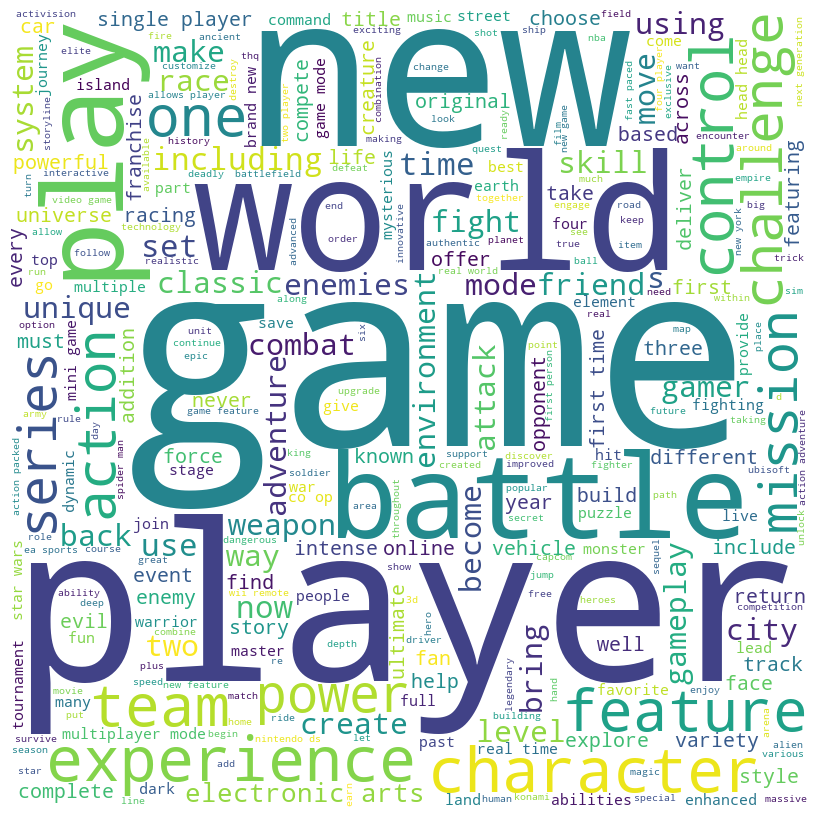

In [12]:
from wordcloud import WordCloud, STOPWORDS
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', max_words=303,
                min_font_size = 10).generate(" ".join(df["summary"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()